# import the module

In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

# 25

In [3]:
dataset_25 = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO"],
                          context_length=25,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_25 = np.array(dataset_25.train_feature_set)
train_label_25 = np.array(dataset_25.train_label_set).ravel()
test_feature_25 = np.array(dataset_25.test_feature_set)
test_leabel_25 = np.array(dataset_25.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了15条非法长度的数据，当前蛋白质长度被限制在(25, 5000)
-删除条875个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了0条非法长度的数据，当前蛋白质长度被限制在(25, 5000)
-删除条16个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征....

100%|██████████| 344/344 [00:00<00:00, 10117.81it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:2.5039634704589844


Starting Training...
[LightGBM] [Info] Total Bins 126302
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 979
[LightGBM] [Info] Start training from score -2.200285
Time for Training: 0.7225742340087891
[LightGBM] [Info] Total Bins 123369
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 978
[LightGBM] [Info] Start training from score -2.196873
[LightGBM] [Info] Total Bins 122994
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 978
[LightGBM] [Info] Start training from score -2.253138
[LightGBM] [Info] Total Bins 122462
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 978
[LightGBM] [Info] Start training from score -2.103636
[LightGBM] [Info] Total Bins 122587
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 978
[LightGBM] [Info] Start training from score -2.238943
[LightGBM] [Info] Total Bi

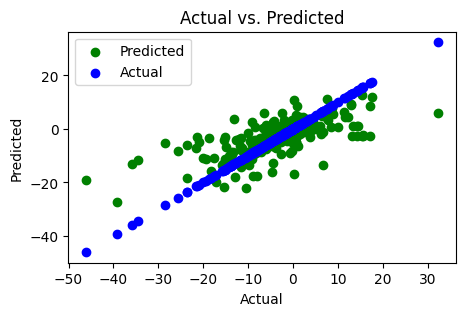

In [3]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_25,
                      train_label_25,
                      test_feature_25,
                      test_leabel_25)

Starting Training...
Time for Training: 1.680582046508789
The Result for CV:
MAE:2.2146
PCC:0.8793
R2:0.7724
RMSE:3.5834
Time for CV:8.167352676391602
Starting Testing...
The Result for Testing:MAE:3.6381
PCC:0.7115
R2:0.5054
RMSE:5.9279
Time for Testing:0.0030002593994140625


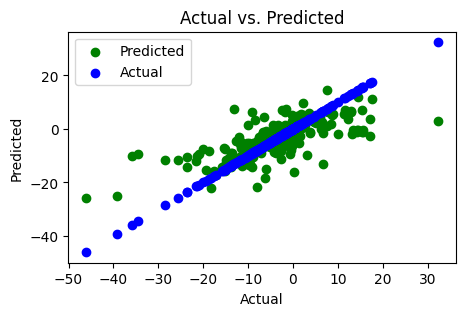

In [4]:
train_validation_test(XGBRegressor(),
                      train_feature_25,
                      train_label_25,
                      
                      
                      test_feature_25,
                      test_leabel_25)

# 50

In [5]:
dataset_50 = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=50,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_50 = np.array(dataset_50.train_feature_set)
train_label_50 = np.array(dataset_50.train_label_set).ravel()
test_feature_50 = np.array(dataset_50.test_feature_set)
test_leabel_50 = np.array(dataset_50.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了15条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条875个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了0条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条16个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.008752822875976562
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.008752822875976562
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 344/344 [00:00<00:00, 9952.55it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 131602
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 1004
[LightGBM] [Info] Start training from score -2.200285
Time for Training: 0.6431570053100586
[LightGBM] [Info] Total Bins 128667
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 1003
[LightGBM] [Info] Start training from score -2.196873
[LightGBM] [Info] Total Bins 128256
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 1003
[LightGBM] [Info] Start training from score -2.253138
[LightGBM] [Info] Total Bins 127715
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 1003
[LightGBM] [Info] Start training from score -2.103636
[LightGBM] [Info] Total Bins 127782
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 1003
[LightGBM] [Info] Start training from score -2.238943
[LightGBM] [Info] Tot

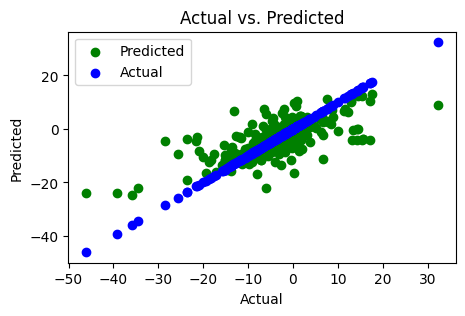

In [6]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_50,
                      train_label_50,
                      test_feature_50,
                      test_leabel_50)

Starting Training...
Time for Training: 1.6254420280456543
The Result for CV:
MAE:2.2175
PCC:0.8772
R2:0.7686
RMSE:3.6172
Time for CV:7.753687143325806
Starting Testing...
The Result for Testing:MAE:4.1507
PCC:0.6822
R2:0.4537
RMSE:6.2297
Time for Testing:0.004164695739746094


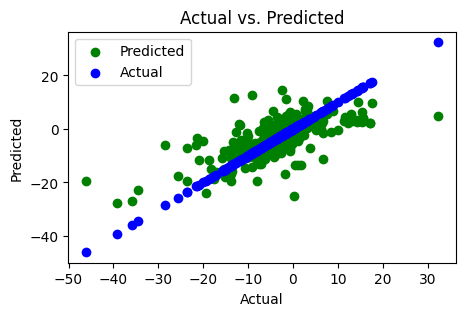

In [7]:
train_validation_test(XGBRegressor(),
                      train_feature_50,
                      train_label_50,
                      test_feature_50,
                      test_leabel_50)

# 100

In [8]:
dataset_100 = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=100,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_100 = np.array(dataset_100.train_feature_set)
train_label_100 = np.array(dataset_100.train_label_set).ravel()
test_feature_100 = np.array(dataset_100.test_feature_set)
test_leabel_100 = np.array(dataset_100.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了411条非法长度的数据，当前蛋白质长度被限制在(100, 5000)
-删除条841个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了38条非法长度的数据，当前蛋白质长度被限制在(100, 5000)
-删除条15个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.009539604187011719
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.009539604187011719
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 307/307 [00:00<00:00, 10233.34it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 140988
[LightGBM] [Info] Number of data points in the train set: 5775, number of used features: 1053
[LightGBM] [Info] Start training from score -2.212757
Time for Training: 0.6780719757080078
[LightGBM] [Info] Total Bins 136988
[LightGBM] [Info] Number of data points in the train set: 4620, number of used features: 1053
[LightGBM] [Info] Start training from score -2.201580
[LightGBM] [Info] Total Bins 136377
[LightGBM] [Info] Number of data points in the train set: 4620, number of used features: 1053
[LightGBM] [Info] Start training from score -2.124191
[LightGBM] [Info] Total Bins 136609
[LightGBM] [Info] Number of data points in the train set: 4620, number of used features: 1053
[LightGBM] [Info] Start training from score -2.292457
[LightGBM] [Info] Total Bins 136783
[LightGBM] [Info] Number of data points in the train set: 4620, number of used features: 1053
[LightGBM] [Info] Start training from score -2.217819
[LightGBM] [Info] Tot

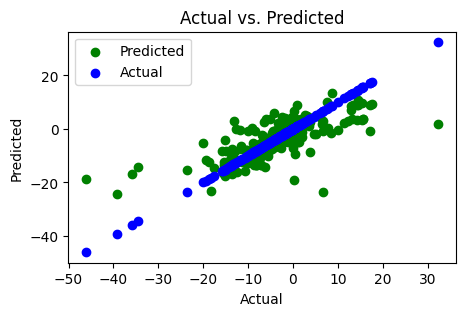

In [9]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_100,
                      train_label_100,
                      test_feature_100,
                      test_leabel_100)

Starting Training...
Time for Training: 1.7671535015106201
The Result for CV:
MAE:2.1530
PCC:0.8788
R2:0.7698
RMSE:3.5253
Time for CV:8.336439371109009
Starting Testing...
The Result for Testing:MAE:3.7885
PCC:0.7522
R2:0.5655
RMSE:5.3914
Time for Testing:0.003000020980834961


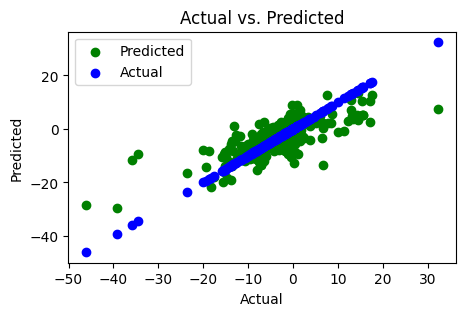

In [10]:
train_validation_test(XGBRegressor(),
                      train_feature_100,
                      train_label_100,
                      test_feature_100,
                      test_leabel_100)

# 200

In [11]:
dataset_200 = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_200 = np.array(dataset_200.train_feature_set)
train_label_200 = np.array(dataset_200.train_label_set).ravel()
test_feature_200 = np.array(dataset_200.test_feature_set)
test_leabel_200 = np.array(dataset_200.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9681.58it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141709
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.5967957973480225
[LightGBM] [Info] Total Bins 134412
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135319
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133134
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135026
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

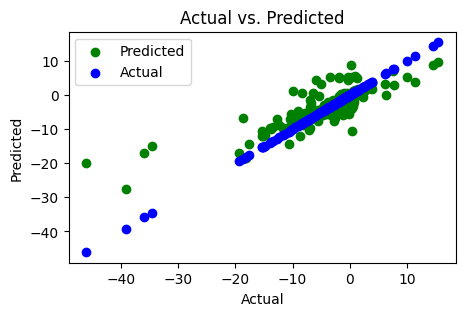

In [12]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_200,
                      train_label_200,
                      test_feature_200,
                      test_leabel_200)

Starting Training...
Time for Training: 1.8570358753204346
The Result for CV:
MAE:2.0299
PCC:0.8807
R2:0.7735
RMSE:3.6016
Time for CV:8.93458867073059
Starting Testing...
The Result for Testing:MAE:3.9726
PCC:0.7429
R2:0.4753
RMSE:5.2459
Time for Testing:0.004000186920166016


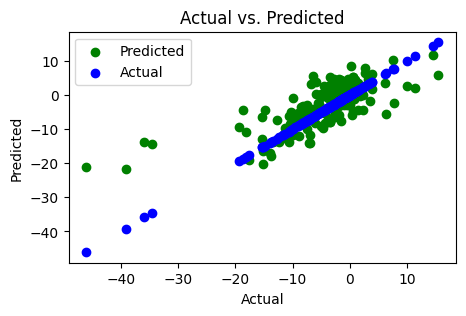

In [13]:
train_validation_test(XGBRegressor(),
                      train_feature_200,
                      train_label_200,
                      test_feature_200,
                      test_leabel_200)

# 500

In [14]:
dataset_500 = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=500,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_500 = np.array(dataset_500.train_feature_set)
train_label_500 = np.array(dataset_500.train_label_set).ravel()
test_feature_500 = np.array(dataset_500.test_feature_set)
test_leabel_500= np.array(dataset_500.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了5982条非法长度的数据，当前蛋白质长度被限制在(500, 5000)
-删除条141个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了317条非法长度的数据，当前蛋白质长度被限制在(500, 5000)
-删除条8个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.01583385467529297
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.01583385467529297
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 35/35 [00:00<00:00, 8748.03it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 103741
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 1430
[LightGBM] [Info] Start training from score -2.812655
Time for Training: 0.3311488628387451
[LightGBM] [Info] Total Bins 93811
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 1429
[LightGBM] [Info] Start training from score -3.040664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

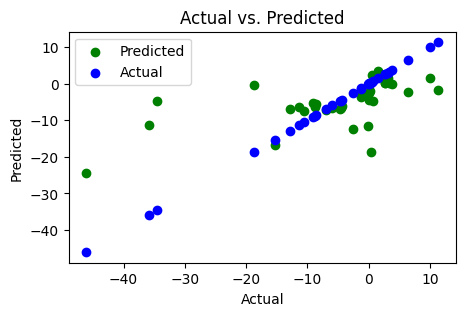

In [15]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_500,
                      train_label_500,
                      test_feature_500,
                      test_leabel_500)

Starting Training...
Time for Training: 1.3948917388916016
The Result for CV:
MAE:2.1822
PCC:0.9015
R2:0.8098
RMSE:3.7699
Time for CV:6.387044429779053
Starting Testing...
The Result for Testing:MAE:5.8495
PCC:0.6146
R2:0.3422
RMSE:9.8836
Time for Testing:0.009000301361083984


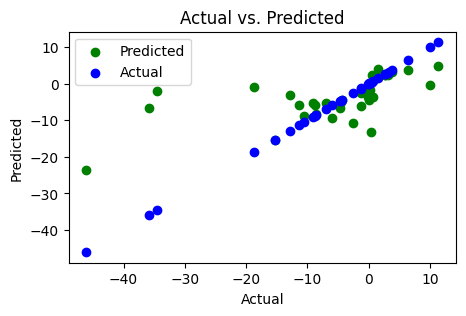

In [16]:
train_validation_test(XGBRegressor(),
                      train_feature_500,
                      train_label_500,
                      test_feature_500,
                      test_leabel_500)

# full-length

In [17]:
dataset_full = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "embedding"],
                          context_length=0,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

train_feature_full = np.array(dataset_full.train_feature_set)
train_label_full = np.array(dataset_full.train_label_set).ravel()
test_feature_full = np.array(dataset_full.test_feature_set)
test_leabel_full = np.array(dataset_full.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了15条非法长度的数据，当前蛋白质长度被限制在(0, 5000)
-删除条875个突变位点对应错误的数据
-不针对突变位点上下文进行截取
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了0条非法长度的数据，当前蛋白质长度被限制在(0, 5000)
-删除条16个突变位点对应错误的数据
-不针对突变位点上下文进行截取
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[embedding]特征.....该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.012246131896972656
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[embedding]特征.....该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.010389328002929688
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 344/344 [00:00<00:00, 8204.44it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 404713
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 2234
[LightGBM] [Info] Start training from score -2.200285
Time for Training: 1.8362174034118652
[LightGBM] [Info] Total Bins 397348
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 2233
[LightGBM] [Info] Start training from score -2.196873
[LightGBM] [Info] Total Bins 393617
[LightGBM] [Info] Number of data points in the train set: 4909, number of used features: 2233
[LightGBM] [Info] Start training from score -2.253138
[LightGBM] [Info] Total Bins 394759
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 2233
[LightGBM] [Info] Start training from score -2.103636
[LightGBM] [Info] Total Bins 396404
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 2233
[LightGBM] [Info] Start training from score -2.238943
[LightGBM] [Info] Tot

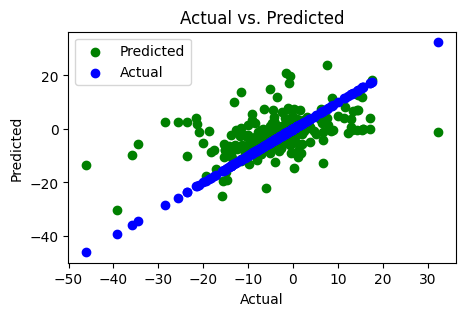

In [18]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      train_feature_full,
                      train_label_full,
                      test_feature_full,
                      test_leabel_full)

Starting Training...
Time for Training: 3.8361117839813232
The Result for CV:
MAE:2.1632
PCC:0.8800
R2:0.7739
RMSE:3.5740
Time for CV:18.21295189857483
Starting Testing...
The Result for Testing:MAE:5.1652
PCC:0.4708
R2:0.1666
RMSE:7.6944
Time for Testing:0.006998777389526367


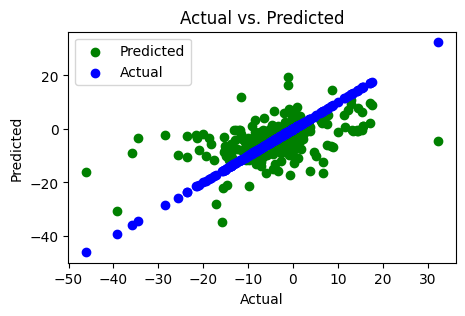

In [19]:
train_validation_test(XGBRegressor(),
                      train_feature_full,
                      train_label_full,
                      test_feature_full,
                      test_leabel_full)